In [47]:
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap
import os
import sys
import netCDF4 as nc 
import warnings
import numpy.ma as ma
sys.path.append('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/')
#import temporel #, InversionBinnedParallel



In [48]:
save_fig = 1

In [49]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    # m.shadedrelief(scale=scale)
    m.drawlsmask(land_color='gray',ocean_color='white',lakes=True)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def mask_observations(observations, inversion):
    new_inversion = np.copy(inversion)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                new_inversion[i][j] = np.nan
    return new_inversion


In [50]:
# change this for different dates
AK = np.load("/home/erb/masterproject/MSCI_project/snow_ice/carmen/daily_numpys/AK_CPOM/FB_interp_2018-2019_25km_20181108.npy")
cs = np.load("/home/erb/masterproject/MSCI_project/snow_ice/carmen/daily_numpys/CS2_LARM/FB_interp_2018-2019_25km_20181108.npy")

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")

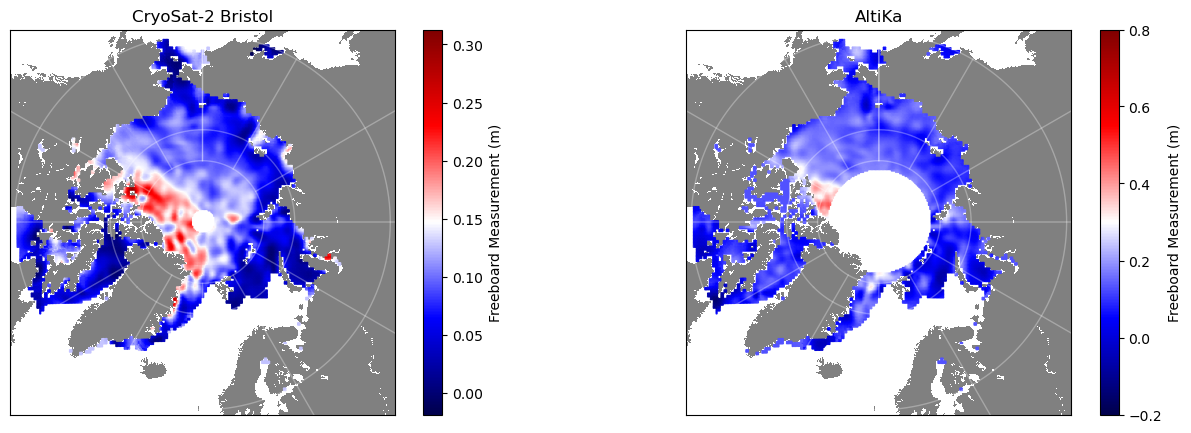

In [51]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs, cmap="seismic")
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title("CryoSat-2 Bristol")

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=AK, cmap="seismic", vmin=-0.2, vmax=0.8)
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title('AltiKa')

plt.show()

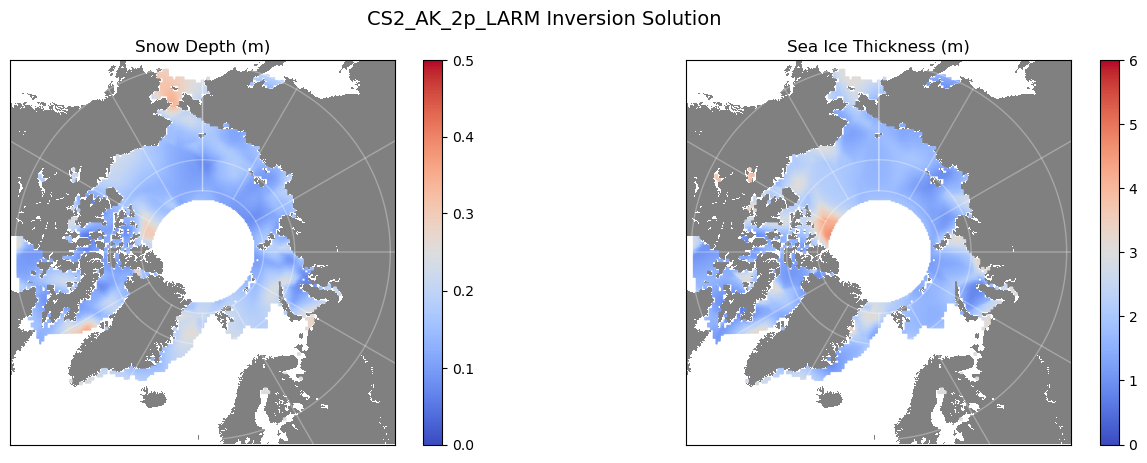

In [52]:
# change this for different dates, inversion images all in images\
snow = np.loadtxt("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/images/20190415.npy_snow")
ice = np.loadtxt("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/images/20190415.npy_ice")

snow = mask_observations(AK, snow)
ice = mask_observations(AK, ice)
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

fig.suptitle("CS2_AK_2p_LARM Inversion Solution", fontsize=14)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
plt.title('Snow Depth (m)')
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow, cmap="coolwarm", vmin=0, vmax=0.5)
plt.colorbar()

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
plt.title('Sea Ice Thickness (m)')
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice, cmap="coolwarm", vmin=0, vmax=6)
plt.colorbar()


# Precise here the name of the run type for the saving of the plot (to modify for each new type of run)

if save_fig == 1 :  
    tesselation = "Delaunay" #InversionBinnedParallel.parametrization
    init_cell   = "1500" #InversionBinnedParallel.initial_cells
    iteration   = "1500000" #InversionBinnedParallel.iterations_number
    date        = "201911/15" #InversionBinnedParallel.date
    slide_window = "15j" 
    ice_density  = "mixte"
    alpha_cs2 = "0.75"
    hierarchical = "no"
    name_type_run = "tesselation" + tesselation + "_initcell" + init_cell + "_iteration" + iteration + "_date" + "_window" + slide_window + "_icedensity" + ice_density + "_alphacs2" + alpha_cs2 + "_hierarchical" + hierarchical 
    
    plt.savefig("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_plot/non_interpolated_input/" + date +name_type_run +'.png')
    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/' + date + name_type_run + '_snow', snow)
    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/' + date + name_type_run + '_ice', ice)


plt.show()

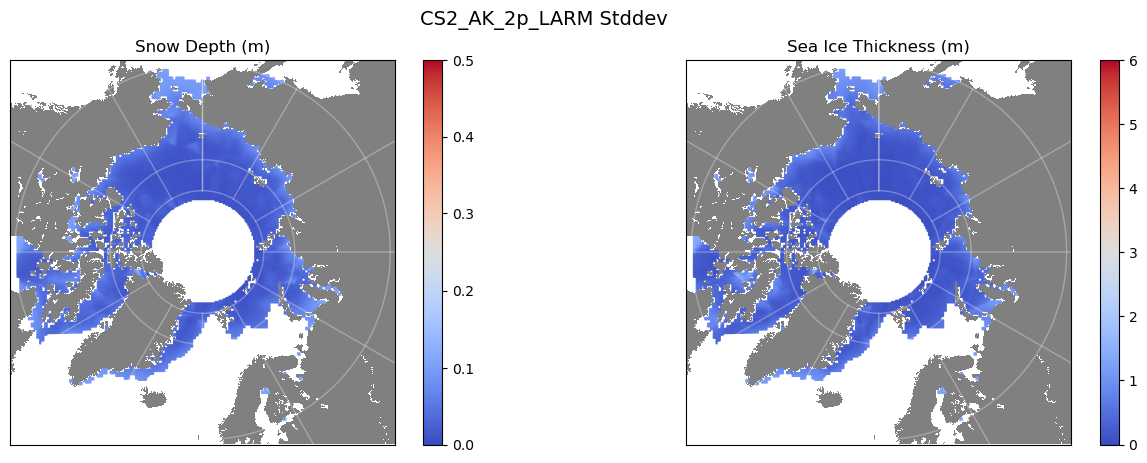

In [53]:
# change this for different dates, inversion images all in images\
snow = np.loadtxt("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/images/20181108.npy_snow_stddev")
ice = np.loadtxt("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/images/20181108.npy_ice_stddev")

snow = mask_observations(AK, snow)
ice = mask_observations(AK, ice)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

fig.suptitle("CS2_AK_2p_LARM Stddev", fontsize=14)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
plt.title('Snow Depth (m)')
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow, cmap="coolwarm", vmin=0, vmax=0.5)
plt.colorbar()

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
plt.title('Sea Ice Thickness (m)')
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice, cmap="coolwarm", vmin=0, vmax=6)
plt.colorbar()

if save_fig == 1 :  
    tesselation = "Delaunay" #InversionBinnedParallel.parametrization
    init_cell   = "1500" #InversionBinnedParallel.initial_cells
    iteration   = "1500000" #InversionBinnedParallel.iterations_number
    date        = "201911/15" #InversionBinnedParallel.date
    slide_window = "15j" 
    ice_density  = "mixte"
    alpha_cs2 = "0.75"
    hierarchical = "no"
    name_type_run = "tesselation" + tesselation + "_initcell" + init_cell + "_iteration" + iteration + "_date" + "_window" + slide_window + "_icedensity" + ice_density + "_alphacs2" + alpha_cs2 + "_hierarchical" + hierarchical 

    plt.savefig("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_plot/non_interpolated_input/" + date + name_type_run + '_stddev' + '.png')
    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/' + date + name_type_run + '_snow_stddev', snow)
    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/' + date + name_type_run + '_ice_stddev', ice)



plt.show()

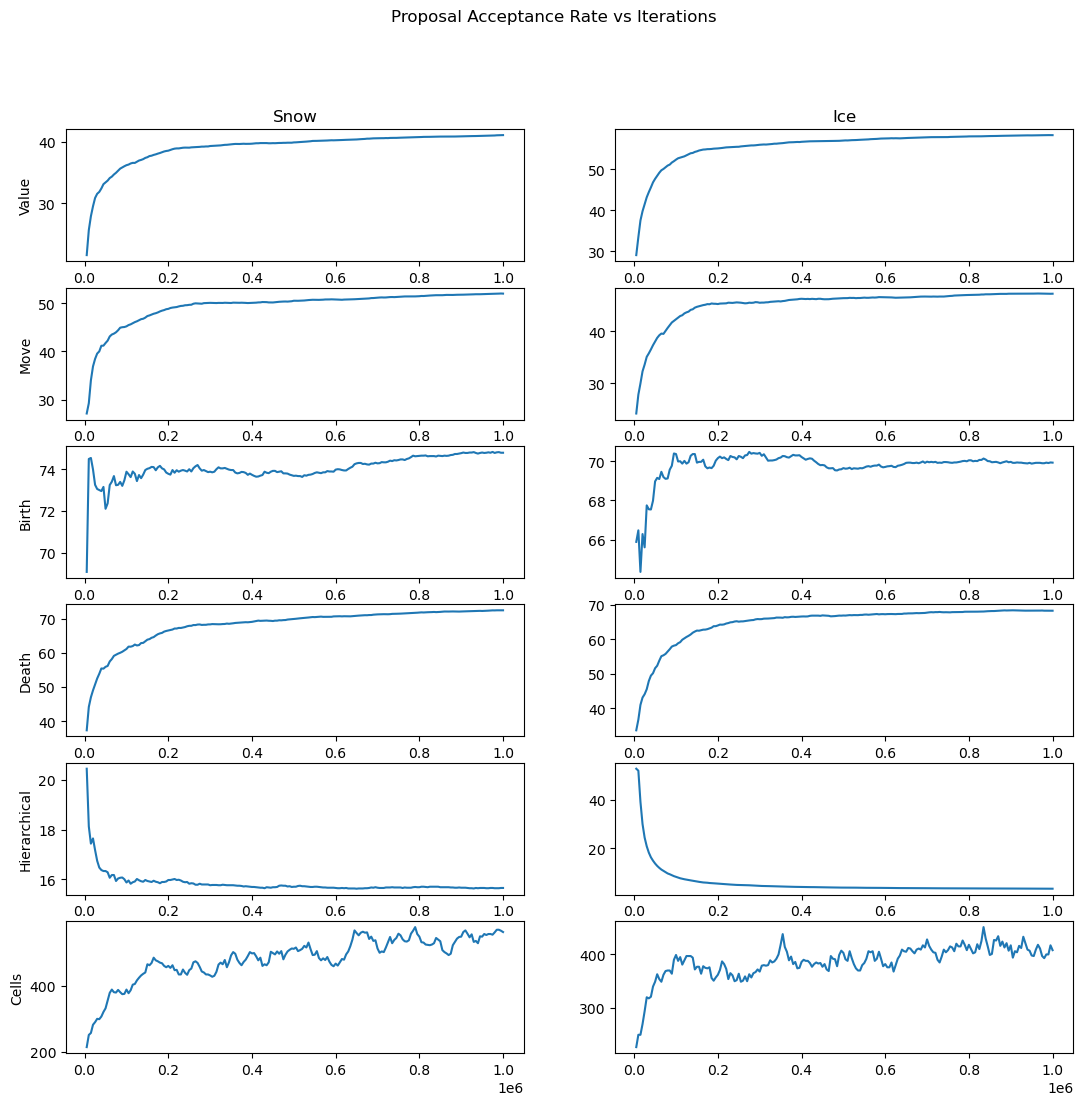

In [54]:
# prints out acceptance rates of the latest inversion
file = '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results/log.txt-000'

iterations = np.arange(5000,1000001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical", "Cells"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))

        if "Cell(s)" in line:
            parts = line.split("Cell(s)")
            if len(parts) > 1:
                values_str = parts[1].strip()
                values = [int(x) for x in values_str.split()]
                if len(values) >= 2:
                    rate["Cells"]["snow"].append(values[0])
                    rate["Cells"]["ice"].append(values[1])

            

plt.figure(figsize=(13,12))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(6,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(6,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(6,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(6,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(6,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(6,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(6,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(6,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(6,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(6,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.subplot(6,2,11)
plt.plot(iterations, rate["Cells"]['snow'],'-')
plt.ylabel("Cells")
plt.subplot(6,2,12)
plt.plot(iterations, rate["Cells"]['ice'],'-')


if save_fig == 1 :  
    tesselation = "Delaunay" 
    init_cell   = "600" 
    iteration   = "1000000" 
    date        = "202004/15"
    slide_window = "5j" 
    error  = "0.01"

    name_type_run = "tesselation" + tesselation + "_initcell" + init_cell + "_iteration" + iteration + "_window" + slide_window + "_error" + error

    plt.savefig("/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_plot/non_interpolated_input/" + date + name_type_run + '_rates' + '.png')

plt.show()